## 1. Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the csv data as a dataframe

In [2]:
df = pd.read_csv('data/exams.csv')

In [3]:
#First 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.shape

(1000, 8)

### 2.1 More information on the dataset

- No. of columns and their names

In [5]:
df.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

- Checking Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Data statistics

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


- Checking number of unique values

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

### 2.2 Data Checks

In [9]:
#Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

-> There are no missing values

In [10]:
#Duplicates
df.duplicated().sum()

0

-> There are no duplicate values

## 3. Exploring the data

In [11]:
print("Categories in 'gender' column : {}".format([df['gender'].unique()]))

print("Categories in 'race' column : {}".format([df['race/ethnicity'].unique()]))

print("Categories in 'parental level of education' column : {}".format([df['parental level of education'].unique()]))

print("Categories in 'lunch' column : {}".format([df['lunch'].unique()]))

Categories in 'gender' column : [array(['female', 'male'], dtype=object)]
Categories in 'race' column : [array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)]
Categories in 'parental level of education' column : [array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)]
Categories in 'lunch' column : [array(['standard', 'free/reduced'], dtype=object)]


In [12]:
# Defining categorical and numerical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#Printing our information
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.1 Adding total and average columns for the scores

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


### 3.2 Number of students with full marks

In [14]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()

print('Number of students with full marks in reading: {}'.format(reading_full))
print('Number of students with full marks in writing: {}'.format(writing_full))
print('Number of students with full marks in maths: {}'.format(math_full))

Number of students with full marks in reading: 10
Number of students with full marks in writing: 13
Number of students with full marks in maths: 9


## 4. Visualisations

### 4.1 Average score distribution

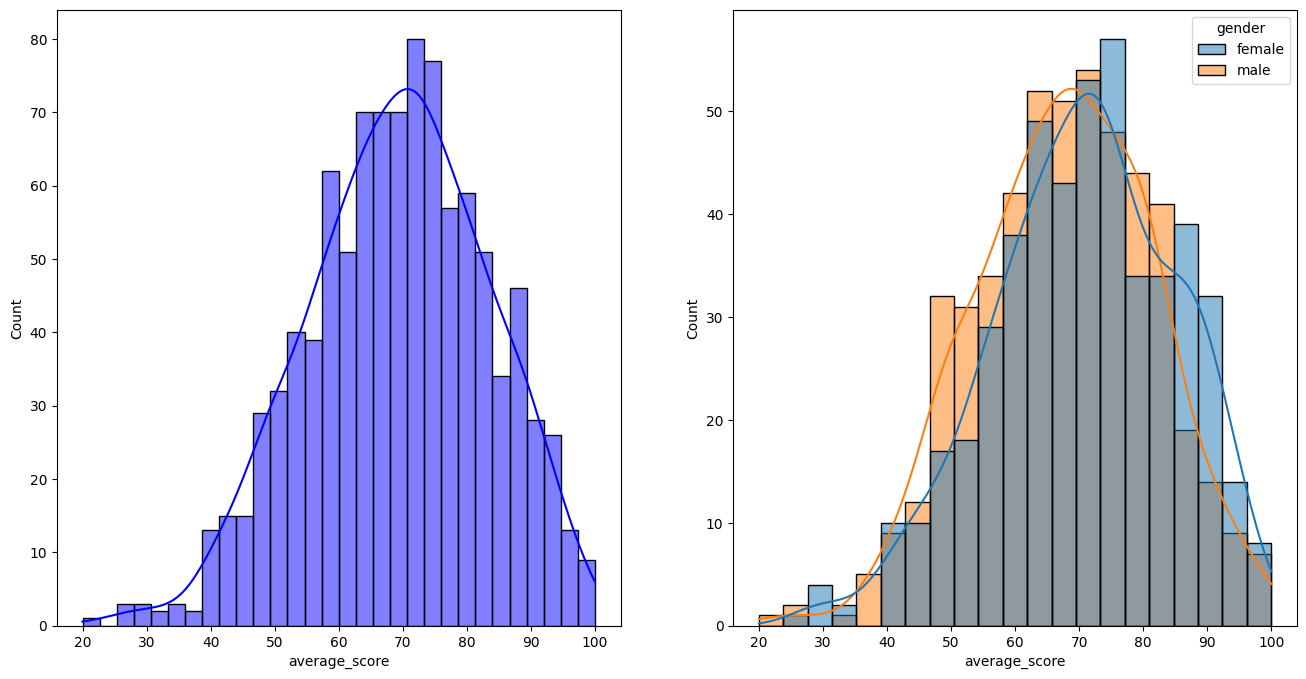

In [16]:
fig, axs = plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

From the above graph we can conclude that female students perform slightly better than their male counterparts as their average score is just above 70.

### 4.2 Total score distribution

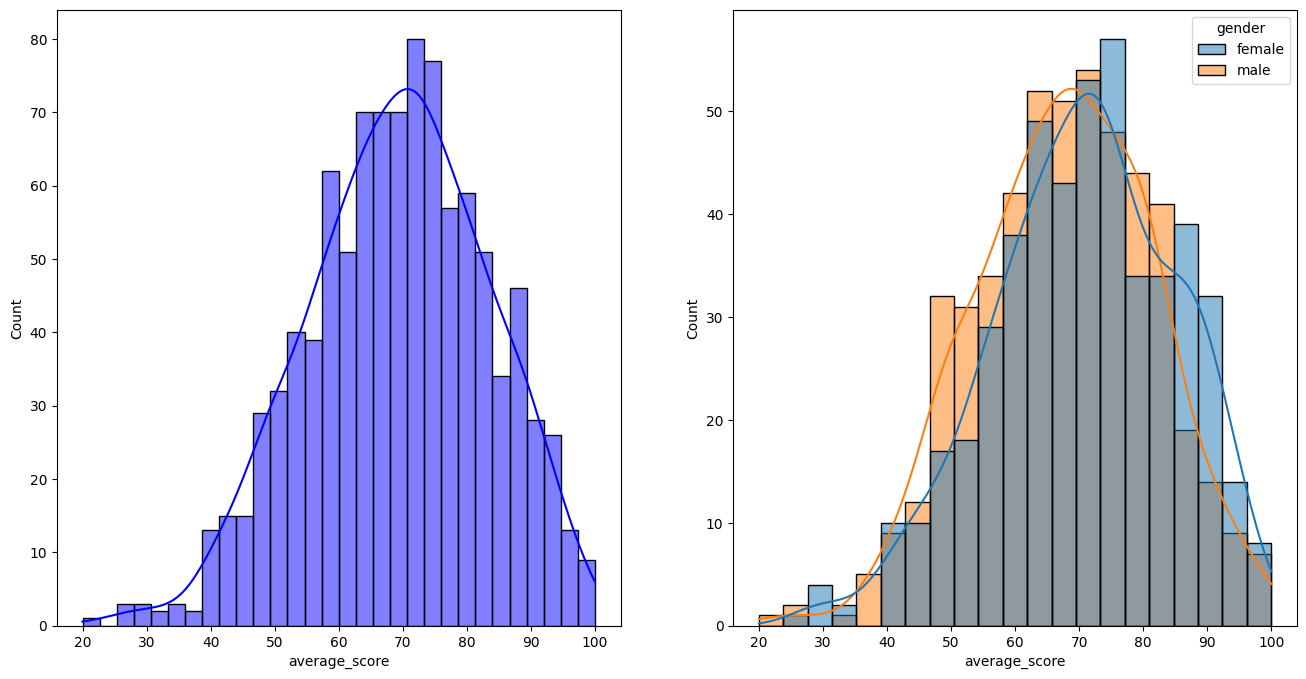

In [17]:
fig, axs = plt.subplots(1,2, figsize=(16,8))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

Our observation from the previous section stands

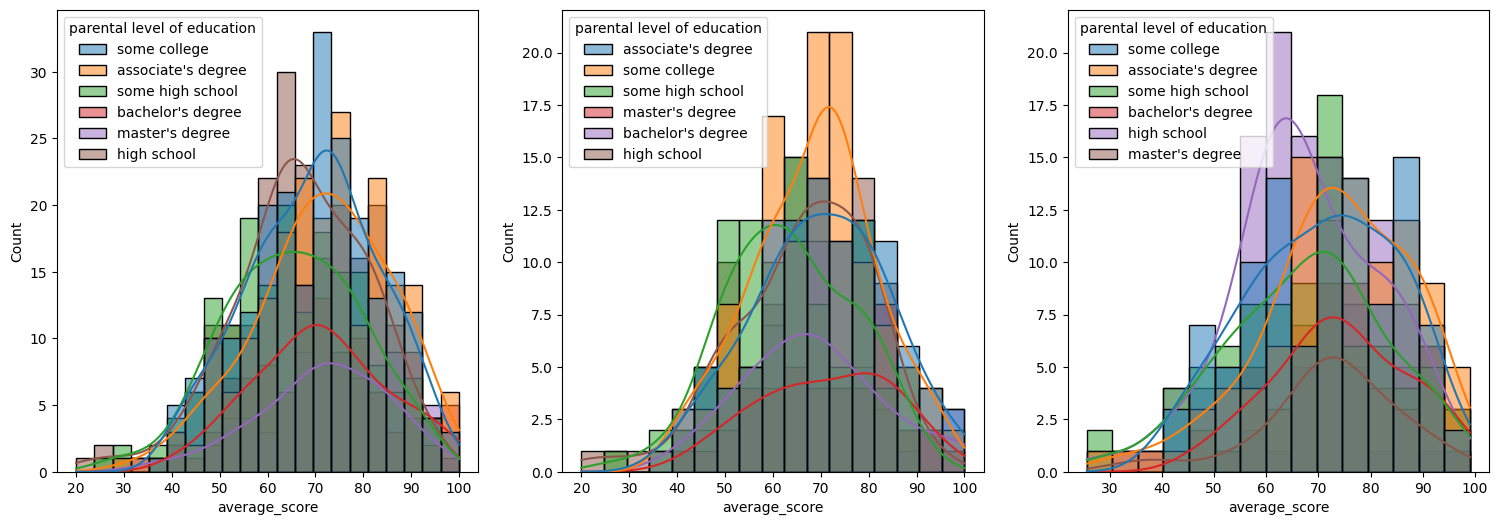

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

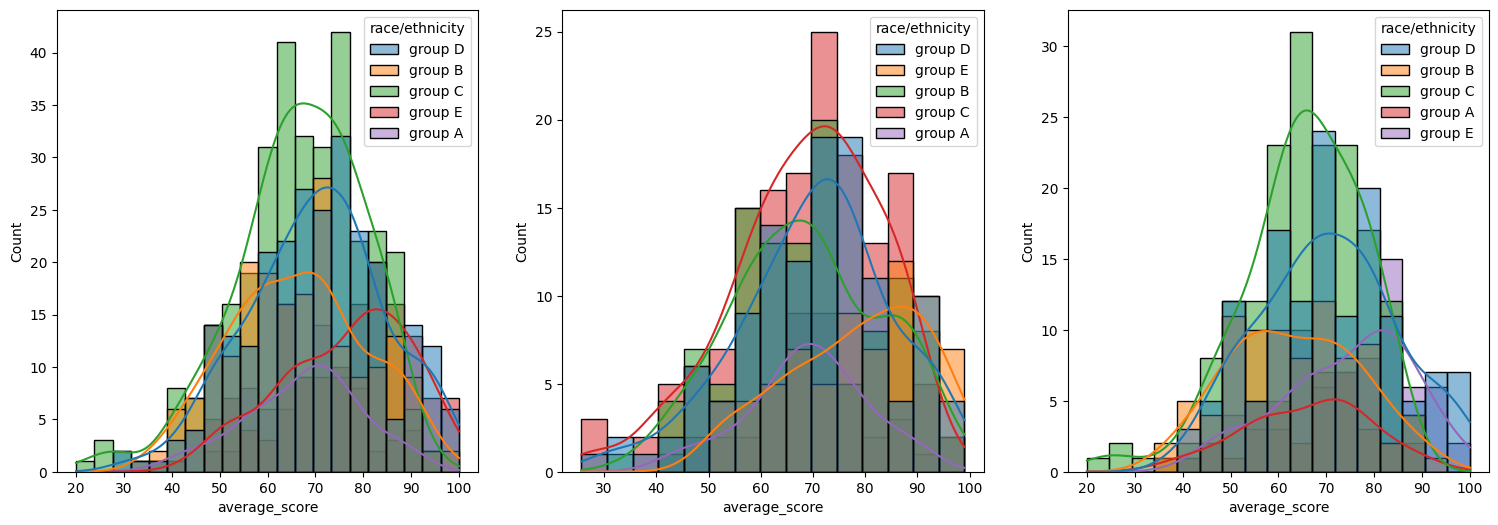

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

- Students of group B tend to perform poorly. (from graph 1)
- Female students of group E perform better. (from graph 3)
- Male students of group A perform average throughout. (from graph 2)

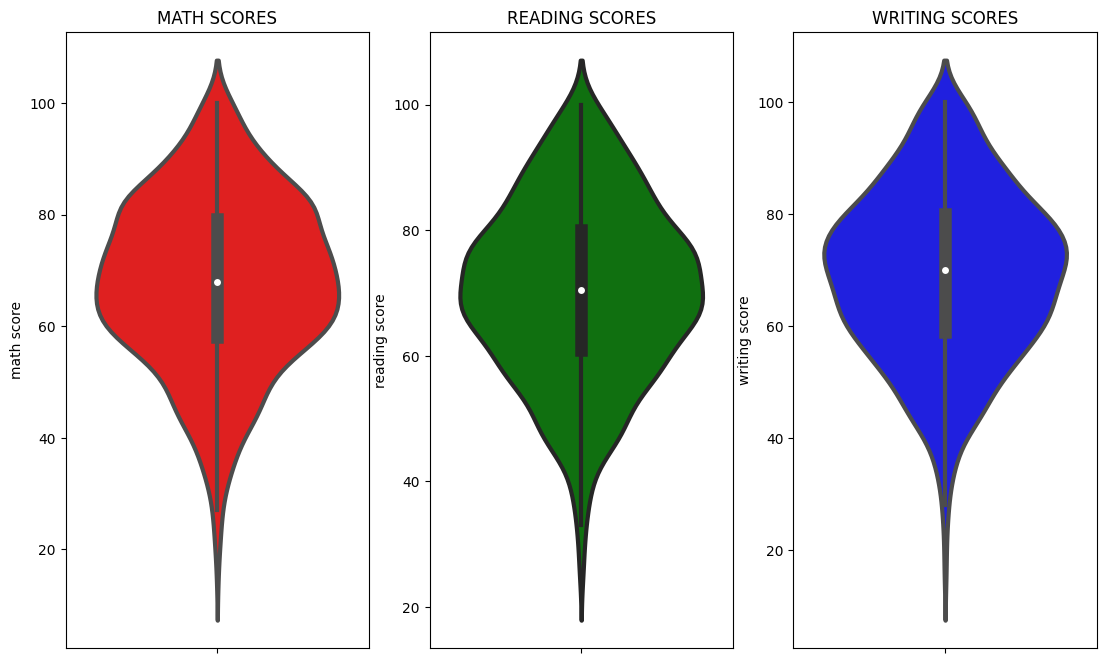

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

- Average score for all the subjects are quite near to each other